## DATA EXPLORATION & PREPARATION (15 points)

In [2]:
direction_encode = {'right': 0, 'left': 1, 'up': 2, 'straight': 3}
eyewear_encode = {'open': 0, "sunglasses":1}

In [3]:
#Imports
from PIL import Image
import os as os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

In [4]:
#Here I define the directories and made 3 function for data exp and prep.
train_directory = "/Users/erenmac/Desktop/Machine_Learning_Assingment2/TrainingSet/"
test_directory = "/Users/erenmac/Desktop/Machine_Learning_Assingment2/TestSet/"

#This func convert image to flat vector.
def imagetovector (path):
    x = []
    for filename in os.listdir(path):
        image_array = np.array(Image.open(path + filename).convert("L"))
        a = image_array.flatten()
        x.append(a)
    return x

#Face direction label generator func
def facedirlabel (path):
    x = []
    for filename in os.listdir(path):
        a = filename.split("_")
        x.append(direction_encode[a[1]])
    return x

#Sunglasses label generator func
def sunglasses (path):
    x = []
    for filename in os.listdir(path):
        a = filename[:-4]
        a = a.split("_")
        x.append(eyewear_encode[a[3]])
    return x

In [5]:
#Results

X_train = imagetovector(train_directory)
y_train_direction = facedirlabel(train_directory)

X_test = imagetovector(test_directory)
y_test_direction = facedirlabel(test_directory)

y_train_eyewear = sunglasses(train_directory)
y_test_eyewear = sunglasses(test_directory)

In [6]:
# DON'T ERASE THIS PART
#I didnt erase them :) but please note that my data is shuffled when i do os.listdir() from whatever reason.

print(sum(X_train[3][3:6]))
print(sum(y_train_direction[-6:]))
print(sum(X_test[3][3:6]))
print(sum(y_test_direction[-6:]))
print(sum(y_train_eyewear[-6:]))
print(sum(y_test_eyewear[-6:]))

35
6
107
8
0
2


## CLASSIFICATION MODEL TO PREDICT DIRECTION FACED (40 points)

### part a

In [7]:
#Setting up SVC as default.
from sklearn.svm import SVC
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train_direction)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
#Setting up GridSearchCV with the parameters given at pdf file.
from sklearn.model_selection import GridSearchCV

#Params
param_grid = [{'kernel': ["linear", "rbf","poly"], 'C': [0.1, 0.5 , 1], "tol": [0.0001, 0.001], "decision_function_shape": ["ovo","ovr"]}]

#Running GSCV
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train_direction)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 0.5, 1], 'tol': [0.0001, 0.001], 'decision_function_shape': ['ovo', 'ovr']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [8]:
#Best params.
best_parameters = grid_search.best_params_
best_parameters

{'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'poly', 'tol': 0.0001}

In [9]:
#Training with SVC with best params
svm_clf_updated = SVC(random_state=0, C= 0.1, decision_function_shape = "ovo",kernel="poly",tol=0.0001)
svm_clf_updated.fit(X_train, y_train_direction)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.0001, verbose=False)

In [10]:
#Getting scores with train acc and validation acc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

train_pred = cross_val_predict(svm_clf_updated, X_train, y_train_direction, cv=5)
svm_scores = cross_val_score(svm_clf_updated, X_train, y_train_direction, cv=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

In [11]:
best_parameters = grid_search.best_params_
training_accuracy = accuracy_score(y_train_direction, train_pred)
validation_accuracy = svm_scores.mean()

In [12]:
print(best_parameters)
print(training_accuracy)
print(validation_accuracy)

{'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'poly', 'tol': 0.0001}
0.9809523809523809
0.9807889344262295


### part b

In [13]:
#Prediction of model
test_predict = svm_clf_updated.predict(X_test)

In [14]:
#I only get F1 score because in pfd you mentioned it, but i didnt use it anywhere?
from sklearn.metrics import f1_score
f1_score(y_test_direction, test_predict, average="weighted")

0.9780301725262965

In [15]:
test_accuracy = accuracy_score(y_test_direction, test_predict)
test_precision = precision_score(y_test_direction, test_predict, average="weighted")
test_recall = recall_score(y_test_direction, test_predict, average="weighted")

In [16]:
print(test_accuracy)
print(test_precision)
print(test_recall)

0.9777777777777777
0.9797101449275362
0.9777777777777777


Did your model perform well on both training and test data? If no, does it underfit or overfit? Write your answer the corresponding cell in the template with a precise explanation. Write your answer below.


My model perform well in both training and test data. Over %97 acc on both.

### part c

In [8]:
from sklearn.model_selection import learning_curve

In [24]:
#Defining my data and labels as x and y
X, y = X_train, y_train_direction

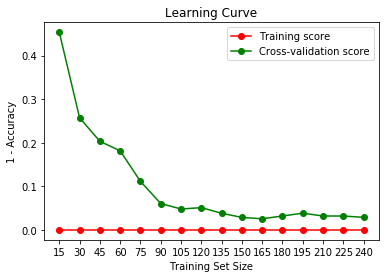

In [47]:
#Here I plot my learning curve with sklearn learning curve func. I made iteration grow by 15 at each step.

def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=None ,cv=None,
                        train_sizes=np.arange(15, 252, 15)):
   
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("1 - Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,n_jobs=n_jobs ,train_sizes=train_sizes,scoring="accuracy")
    train_scores_mean = np.mean(1-train_scores, axis=1)
    test_scores_mean = np.mean(1-test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xticks(np.arange(15, 252, 15))


    plt.legend(loc="best")
    return plt

title = "Learning Curve"
cv = 5
estimator = SVC(random_state=0, C= 0.1, decision_function_shape = "ovo",kernel="poly",tol=0.0001)
plot_learning_curve(estimator, title, X, y, cv=cv,n_jobs=4)

plt.show()

## CLASSIFICATION MODEL TO PREDICT EYEWEAR (25 points)

### part d

In [21]:
#Defining SVC2
svm_clf2 = SVC(random_state=0)
svm_clf2.fit(X_train, y_train_eyewear)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
#Defining LG
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=0, solver="saga")
log_clf.fit(X_train, y_train_eyewear)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
#Looking for best params for svm.
param_grid1 = [{'kernel': ["linear", "rbf","poly"], 'C': [0.1, 0.5 , 1], "tol": [0.0001, 0.001], "decision_function_shape": ["ovo","ovr"]}]

grid_search2 = GridSearchCV(svm_clf2, param_grid1, cv=5, scoring="accuracy")
grid_search2.fit(X_train, y_train_eyewear)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 0.5, 1], 'tol': [0.0001, 0.001], 'decision_function_shape': ['ovo', 'ovr']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
#Looking for best params for LG
param_grid2 = [{'penalty': ["l1", "l2"], 'C': [0.001, 0.01 , 0.1]}]

grid_search3 = GridSearchCV(log_clf, param_grid2, cv=5, scoring="accuracy")
grid_search3.fit(X_train, y_train_eyewear)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
#Reporting best params.
best_parameters_SVC = grid_search2.best_params_
best_parameters_LR = grid_search3.best_params_

best_parameters_SVC , best_parameters_LR

({'C': 0.1,
  'decision_function_shape': 'ovo',
  'kernel': 'linear',
  'tol': 0.0001},
 {'C': 0.001, 'penalty': 'l2'})

In [26]:
#Training updated models with new params.
svm_clf2_updated = SVC(random_state=0, C= 0.1, decision_function_shape = "ovo",kernel="linear",tol=0.0001)
svm_clf2_updated.fit(X_train, y_train_eyewear)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.0001, verbose=False)

In [27]:
#Training updated models with new params.
log_clf_updated = LogisticRegression(random_state=0, solver="saga", C = 0.001, penalty= "l2")
log_clf_updated.fit(X_train, y_train_eyewear)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
#Getting predictions with cross val pred.
train_pred_svc = cross_val_predict(svm_clf2_updated, X_train, y_train_eyewear, cv=5)
train_pred_lr = cross_val_predict(log_clf_updated, X_train, y_train_eyewear, cv=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

In [29]:
#Getting acc scores.
train_acc_svc = accuracy_score(y_train_eyewear, train_pred_svc)
train_acc_lr = accuracy_score(y_train_eyewear, train_pred_lr)

In [30]:
#Getting val acc scores.
val_acc_svc = cross_val_score(svm_clf2_updated, X_train, y_train_eyewear, cv=5)
val_acc_lr = cross_val_score(log_clf_updated, X_train, y_train_eyewear, cv=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

In [31]:
training_accuracy_SVC = train_acc_svc
validation_accuracy_SVC =val_acc_svc.mean()

In [32]:
training_accuracy_LR = train_acc_lr
validation_accuracy_LR =val_acc_lr.mean()

In [33]:
print("SVC RESULTS")
print(best_parameters_SVC)
print(training_accuracy_SVC)
print(validation_accuracy_SVC)
print("\nLR RESULTS")
print(best_parameters_LR)
print(training_accuracy_LR)
print(validation_accuracy_LR)

SVC RESULTS
{'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'linear', 'tol': 0.0001}
0.9174603174603174
0.9170890937019969

LR RESULTS
{'C': 0.001, 'penalty': 'l2'}
0.9174603174603174
0.9170378904249873


### part e

In [34]:
#Predicting the test data.
SVC_preds = svm_clf2_updated.predict(X_test)
LR_preds = log_clf_updated.predict(X_test)

#Getting the acc, precision, recall at bottom for templated variables.

In [35]:
test_accuracy = accuracy_score(y_test_direction, test_predict)
test_precision = precision_score(y_test_direction, test_predict, average="weighted")
test_recall = recall_score(y_test_direction, test_predict, average="weighted")

In [36]:
accuracy_SVC = accuracy_score(y_test_eyewear, SVC_preds)
precision_SVC = precision_score(y_test_eyewear, SVC_preds)
recall_SVC = recall_score(y_test_eyewear,SVC_preds)

In [37]:
accuracy_LR = accuracy_score(y_test_eyewear, LR_preds)
precision_LR = precision_score(y_test_eyewear, LR_preds)
recall_LR = recall_score(y_test_eyewear, LR_preds)

In [38]:
print("SVC RESULTS")
print(accuracy_SVC)
print(precision_SVC)
print(recall_SVC)
print("\nLR RESULTS")
print(accuracy_LR)
print(precision_LR)
print(recall_LR)

SVC RESULTS
0.6888888888888889
0.6829268292682927
0.6511627906976745

LR RESULTS
0.7333333333333333
0.7209302325581395
0.7209302325581395


Which model’s performance is the best? Write your answer below.

Logistic Regression is better with slightly more acc,prec and recall score.

### part f

Do Logistic Regression and SVC models perform well on both training and test data? If no, do they underfit or overfit? Write your answer below. 

Actually they perform really good on training set but when it comes to test they both fail. We see over %91 acc on both models while training but with test they both are under %75. One is around %68 and the other is %73. This clearly shows that our models do OVERFIT. While training both models make their understanding on test data with overfit and when it finally comes to test they both fail due to overfit.

## MODEL EXPLORATION - EYEWEAR PREDICTION (20 points)

In this part, you will try to increase accuracy on X_test (Remember that you should never use test data for training and model tuning. Do the model selection/tuning with cross validation on training data). You may use different models or parameters (Notice that, so far, you tried only a small list of values for parameters such C in the grid search). You may also try to extract new features from images. Your aim is to get a higher test accuracy than the one you got in part (f).

I tried knn algortith here first but with every possible parameters, I can not get any better results so I tried to buff LR and fine tune it at the bottom.

In [39]:
#I set up the KNN algh
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=1)
knn_clf.fit(X_train, y_train_eyewear)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='distance')

In [40]:
#Did the desting directly for see its better or not
y_knn_pred = knn_clf.predict(X_test)

In [41]:
#0.7 is not better than part f so I leave KNN here.
from sklearn.metrics import accuracy_score
accuracy_score(y_test_eyewear, y_knn_pred)

0.7

In [42]:
#---------------------------------------------------------

In [43]:
#I start to fine tune LR. With a little research at the web I find that adjusting tol and max_iter params are good for overfitting models.
log_clf_last = LogisticRegression(random_state=0, solver="saga",C=0.001,penalty="l2",tol=0.1,max_iter=50)
log_clf_last.fit(X_train, y_train_eyewear)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

In [44]:
#Results for models lastest tuning
train_pred_lr_final = cross_val_predict(log_clf_last, X_train, y_train_eyewear, cv=5)
train_acc_lr_final = accuracy_score(y_train_eyewear, train_pred_lr_final)

In [45]:
train_acc_lr_final

0.834920634920635

In [46]:
predfinal = log_clf_last.predict(X_test)

In [47]:
#New score is.
accuracy_score(y_test_eyewear, predfinal)

0.7555555555555555

So we can say that adjusting tolerance and max iterations make our model to less-overfit. We could choose another model, or adjust the parameters more to get even better results but parameter_search algorithm runs slow on large param options so I did a slow and lazy tunings. I wanted to stick with LR since it was the best at part F and i made it better with nearly %2 better acc.

In [48]:
model = log_clf_last = LogisticRegression(random_state=0, solver="saga",C=0.001,penalty="l2",tol=0.1,max_iter=50)
train_accuracy = train_acc_lr_final
test_accuracy = accuracy_score(y_test_eyewear, predfinal)

In [49]:
print(train_accuracy)
print(test_accuracy)

0.834920634920635
0.7555555555555555
